In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import time
import nltk 
import re 

from bs4 import BeautifulSoup
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")
df.isnull().sum()

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd

In [43]:
# Download wordnet resource
nltk.download('wordnet')

def data_cleaner(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Removing Special Characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Removing stop words & text lemmatization
    lemmatizer = WordNetLemmatizer()

    # Use set for faster membership test
    stop_words = set(stopwords.words('english'))
    tokens = re.split('\W+', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words])

    # Removing square brackets & urls
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r'https\S+', '', text)
    
    return text

[nltk_data] Downloading package wordnet to /Users/jay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df['review'] = df['review'].apply(data_cleaner)
  
tfidf = TfidfVectorizer(max_features=25000, ngram_range=(1,3))
text_count_matrix = tfidf.fit_transform(df['review'])
X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)



/var/folders/sc/5p8bmm597vb00jmfxx5vzj2h0000gn/T/ipykernel_20779/521634048.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Accuracy Score: 90.10000000000001 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4432  527]
 [ 463 4578]]


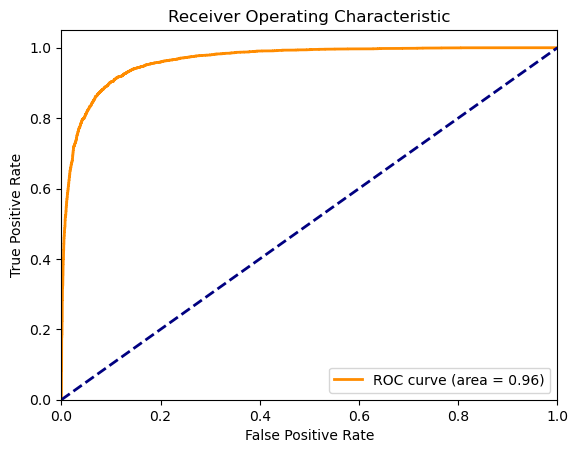

ROC Curve:
AUC Score: 0.9641363485280751


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer



# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix

accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 87.5 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4959
           1       0.87      0.88      0.88      5041

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000

Confusion Matrix:
[[4294  665]
 [ 585 4456]]


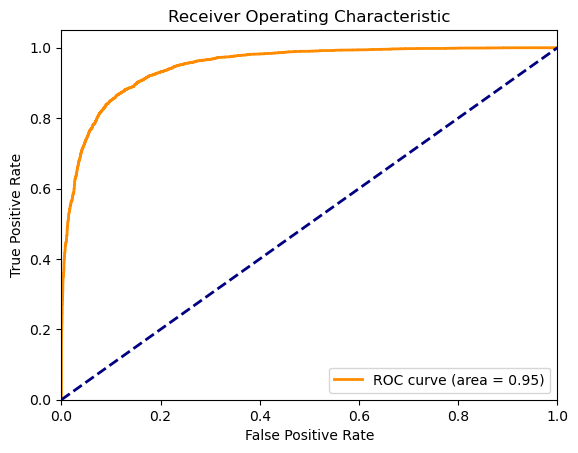

ROC Curve:
AUC Score: 0.948494656780722


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB  # Importing Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_pred_log_proba = model.predict_log_proba(X_test)
y_pred_proba = np.exp(y_pred_log_proba)[:, 1]  # Converting log probabilities to probabilities

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 89.03 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4959
           1       0.88      0.90      0.89      5041

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4366  593]
 [ 504 4537]]


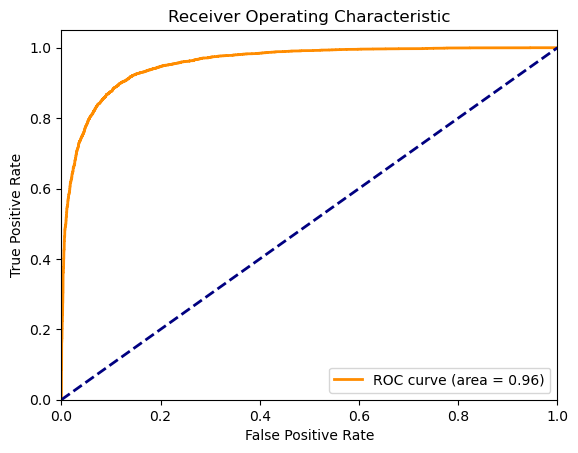

ROC Curve:
AUC Score: 0.956442671205212


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier  # Import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer


# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model using SGD
model = SGDClassifier(loss='log_loss', max_iter=500, random_state=101)  # Using 'log' loss for logistic regression
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 85.97 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4959
           1       0.87      0.85      0.86      5041

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
[[4318  641]
 [ 762 4279]]


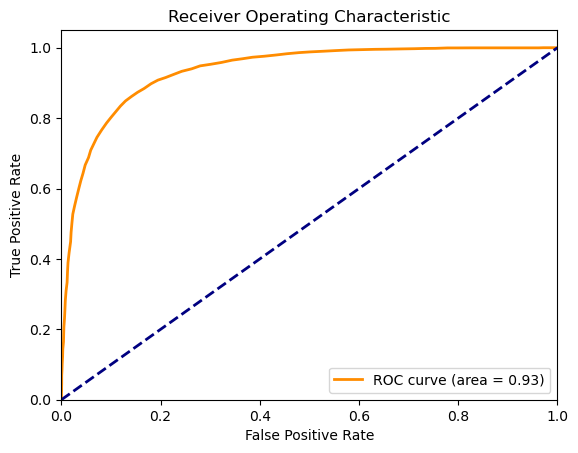

ROC Curve:
AUC Score: 0.9343641866479101


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=101)  # Change to RandomForestClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Keep this line for ROC curve

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 86.04 %
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4959
           1       0.85      0.88      0.86      5041

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
[[4187  772]
 [ 624 4417]]


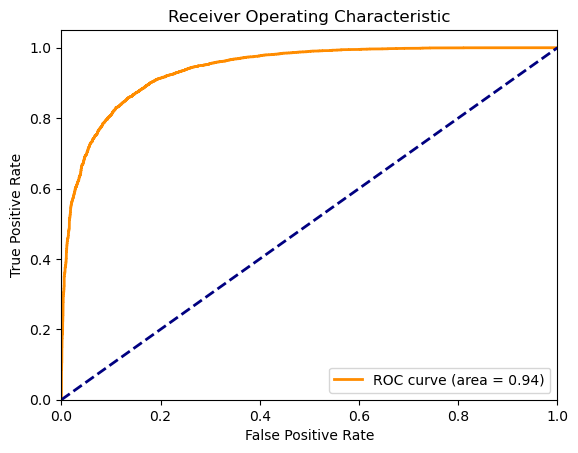

ROC Curve:
AUC Score: 0.9392443147877263


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the XGBoost model
model = XGBClassifier(random_state=101)  # Change to XGBClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Keep this line for ROC curve

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 80.49 %
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4959
           1       0.79      0.83      0.81      5041

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

Confusion Matrix:
[[3865 1094]
 [ 857 4184]]


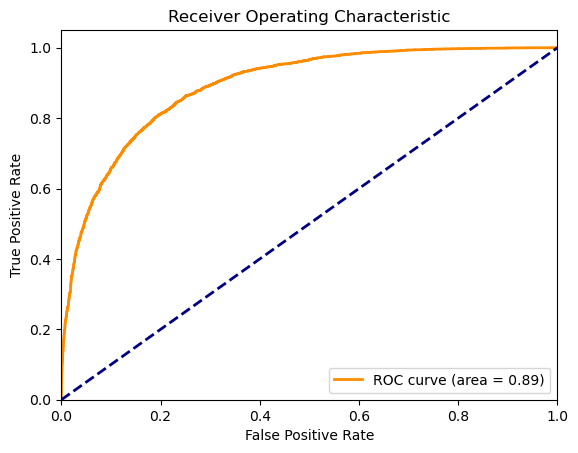

ROC Curve:
AUC Score: 0.8908500807594304


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

# Feature selection using LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(text_count_matrix, df['sentiment'])
model = SelectFromModel(lsvc, prefit=True, max_features=1867)
X_new = model.transform(text_count_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_new, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 89.36 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4959
           1       0.89      0.90      0.90      5041

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4385  574]
 [ 490 4551]]


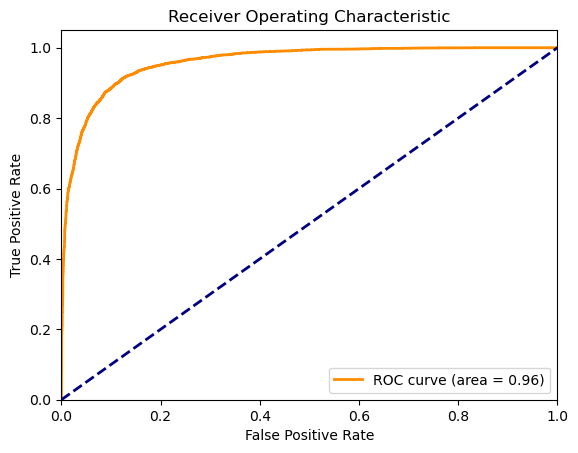

ROC Curve:
AUC Score: 0.959242339454905


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Feature selection
kbest = SelectKBest(chi2, k=5000)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_kbest, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_kbest)
y_pred_proba = model.predict_proba(X_test_kbest)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 88.87 %
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4959
           1       0.88      0.90      0.89      5041

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4365  594]
 [ 519 4522]]


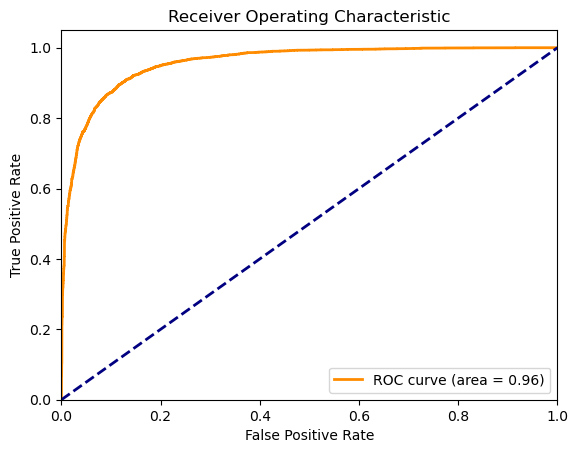

ROC Curve:
AUC Score: 0.9567956149371484


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# ...

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Feature selection using a tree-based model
tree_model = RandomForestClassifier(n_estimators=100)
tree_model.fit(X_train, y_train)

# Select top 4013 features
sel = SelectFromModel(tree_model, max_features=4013, threshold=-np.inf)
X_train_selected = sel.fit_transform(X_train, y_train)
X_test_selected = sel.transform(X_test)

# Create and train the logistic regression model on the selected features
model = LogisticRegression(max_iter=500)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 87.98 %
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4959
           1       0.87      0.89      0.88      5041

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[4307  652]
 [ 550 4491]]


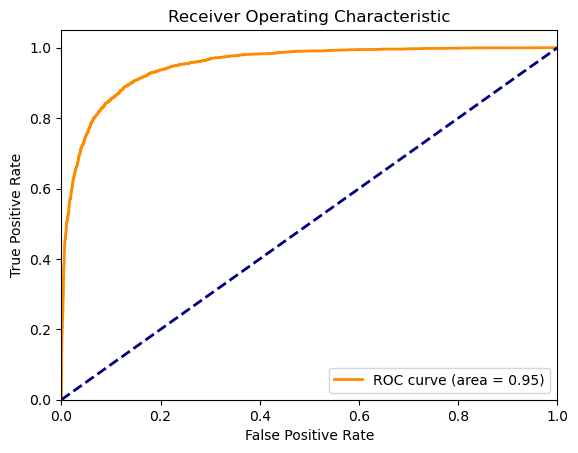

ROC Curve:
AUC Score: 0.9505436345539873


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer


# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Feature selection using Tree-based method
tree_clf = ExtraTreesClassifier(n_estimators=100)
tree_clf = tree_clf.fit(X_train, y_train)
model = SelectFromModel(tree_clf, prefit=True, max_features=4013)

X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

# Create and train the logistic regression model using SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=500, random_state=101)  # Using 'log' loss for logistic regression
sgd_model.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = sgd_model.predict(X_test_new)
y_pred_proba = sgd_model.predict_proba(X_test_new)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 88.01 %
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4959
           1       0.87      0.89      0.88      5041

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[4291  668]
 [ 531 4510]]


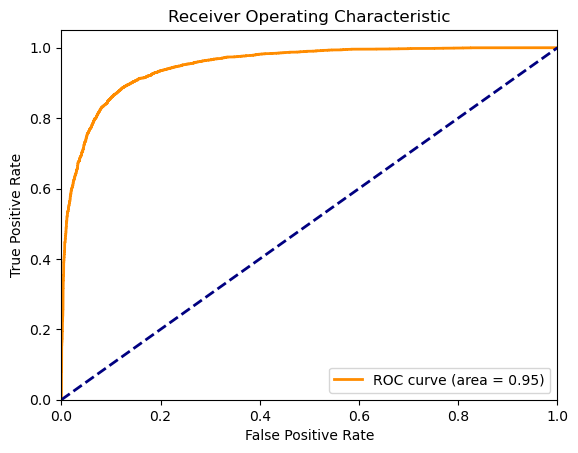

ROC Curve:
AUC Score: 0.9497876237198188


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier  # Import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2  # Import SelectKBest and chi2

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Feature Selection - Select the k=5000 best features
selector = SelectKBest(chi2, k=5000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create and train the logistic regression model using SGD
model = SGDClassifier(loss='log_loss', max_iter=500, random_state=101)  # Using 'log' loss for logistic regression
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


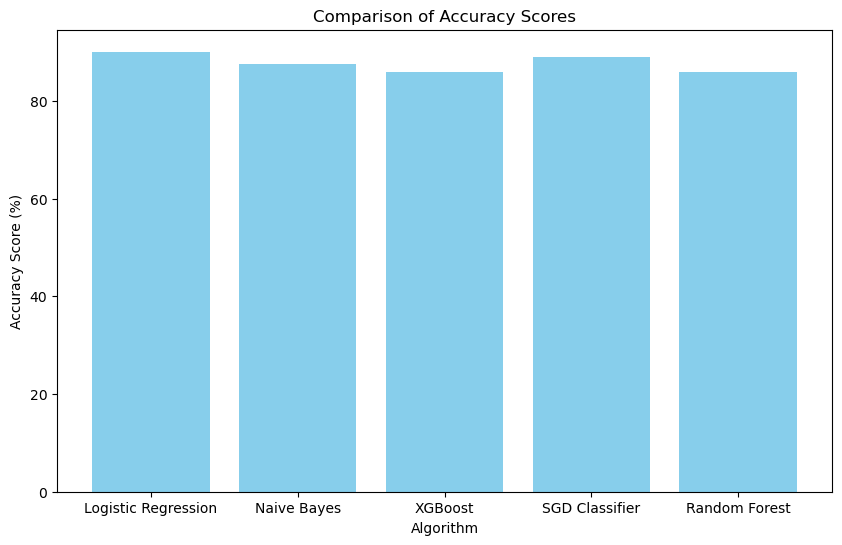

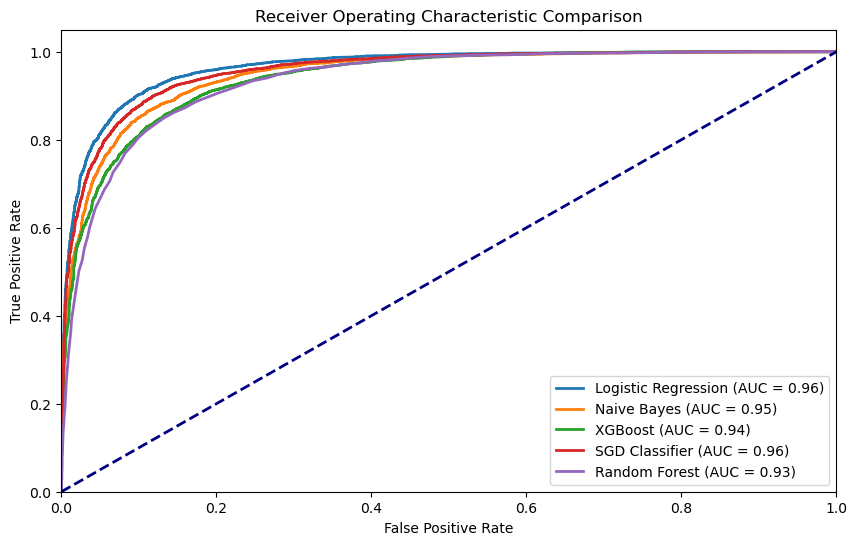

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming 'text_count_matrix' and 'df.sentiment' are already defined

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SGD Classifier": SGDClassifier(max_iter=1000, loss='log_loss'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Training models and calculating accuracy, ROC curve, and AUC
accuracy_scores = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy_scores[name] = accuracy_score(y_test, y_pred) * 100
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

# Plotting accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Accuracy Scores')
plt.show()

# Plotting ROC curves
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()


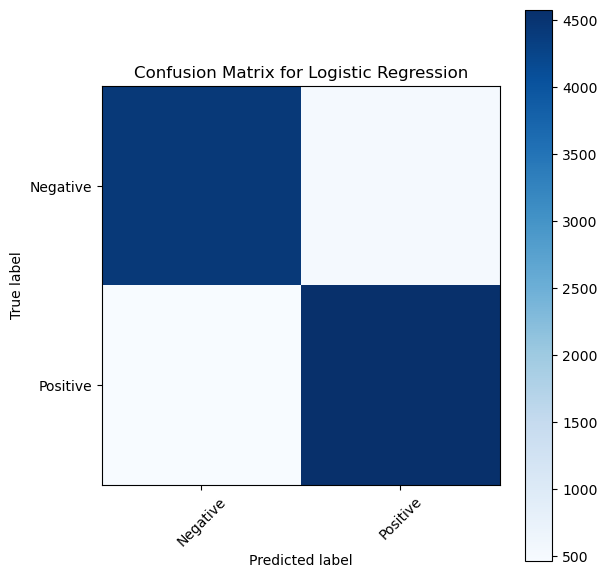

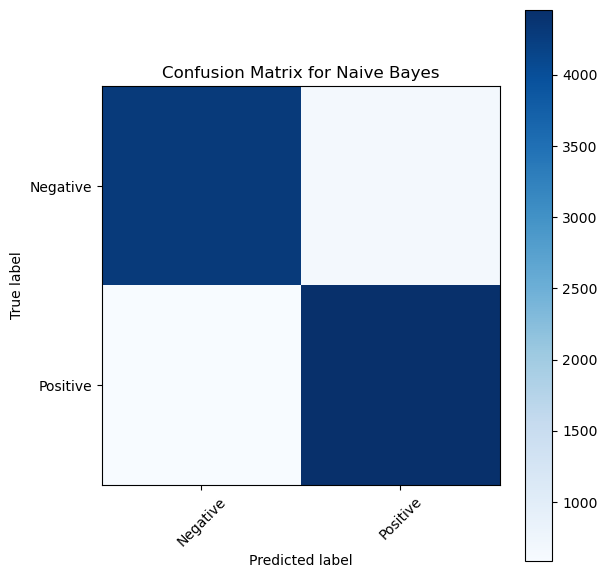

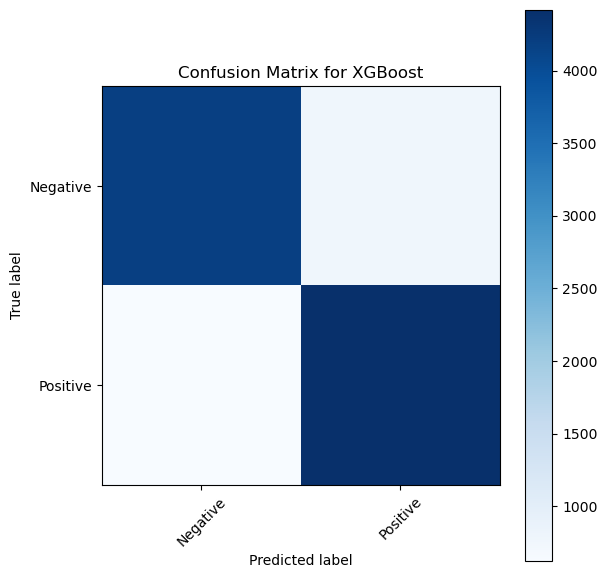

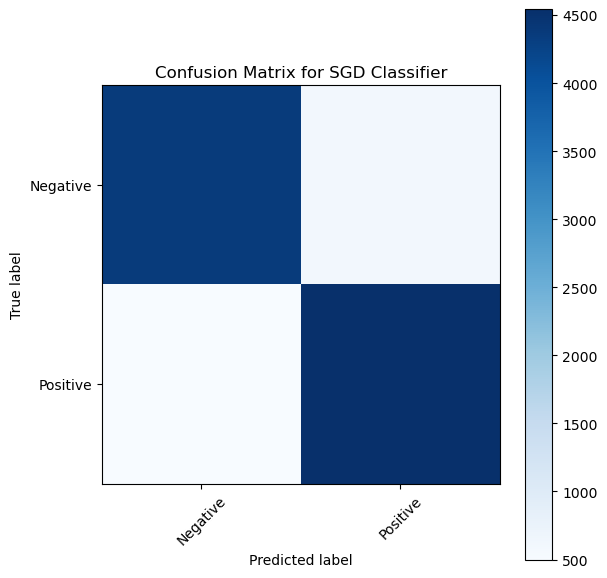

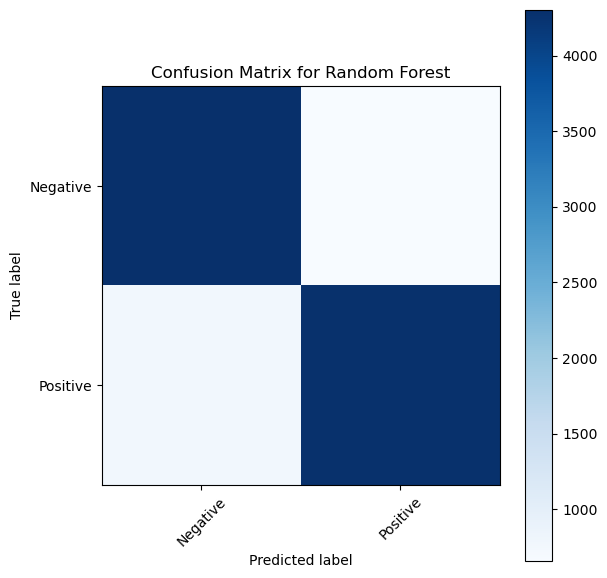

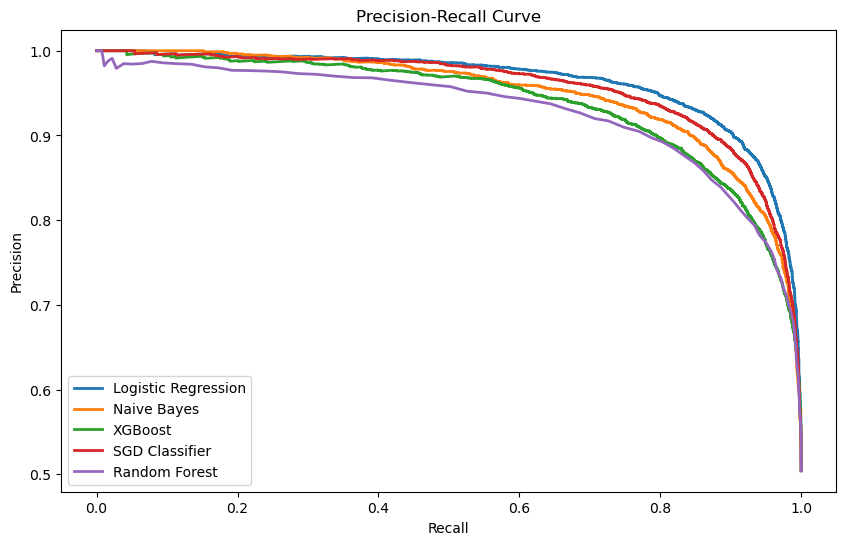

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score





for name, model in models.items():
    y_pred = model.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)



# Confusion Matrix for each model
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, lw=2, label=f'{name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


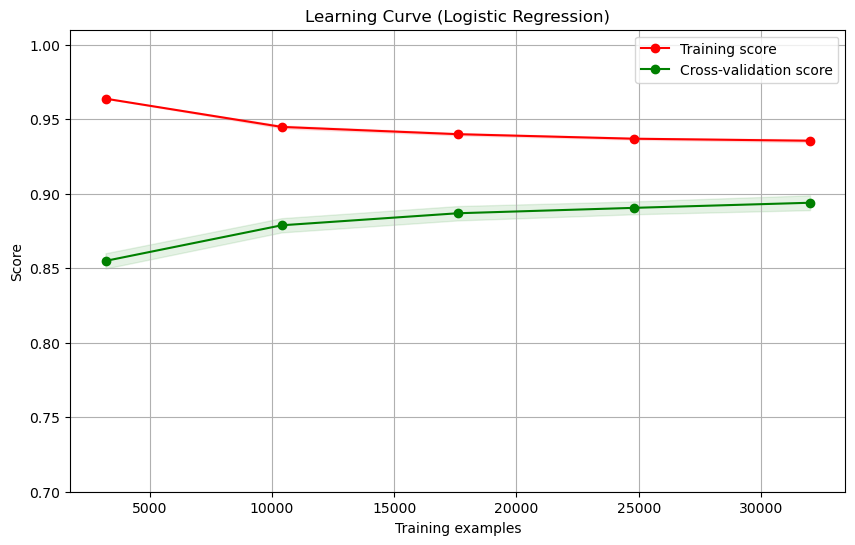

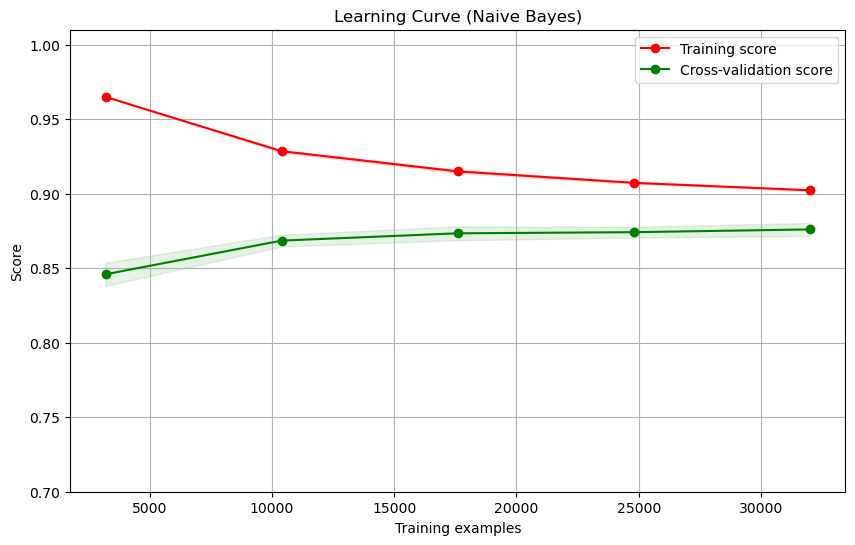

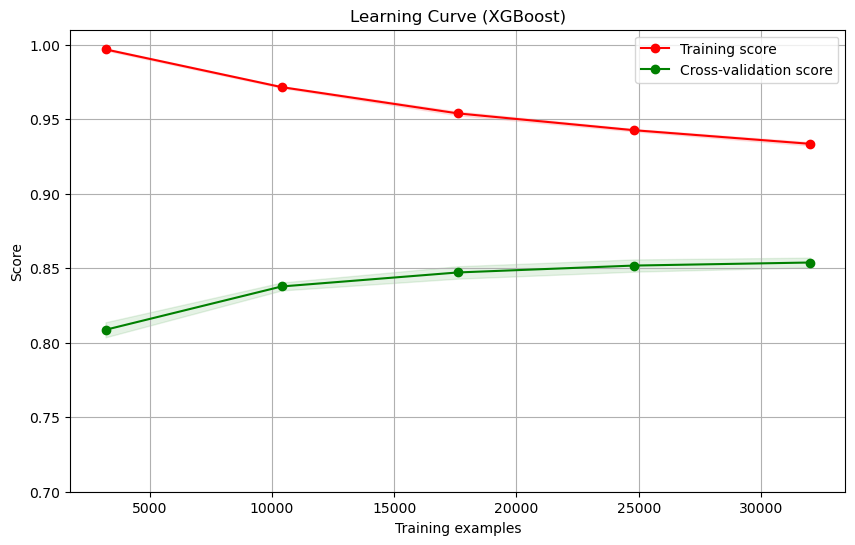

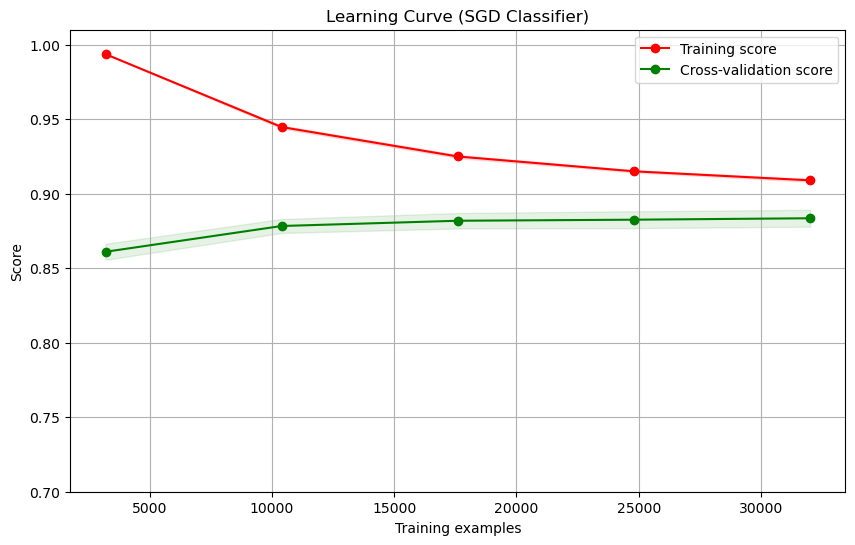

/Users/jay/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


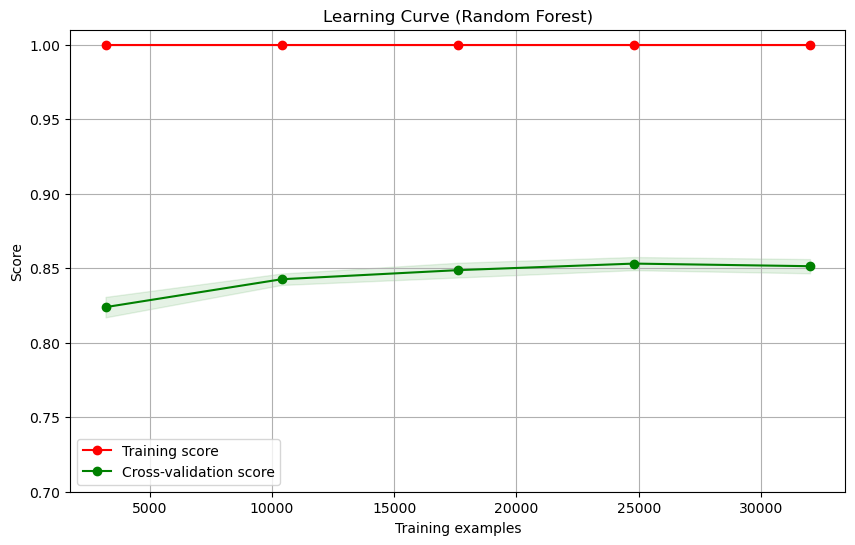

In [30]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot learning curves for each model
for name, model in models.items():
    plt = plot_learning_curve(model, f'Learning Curve ({name})', X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4)
    plt.show()

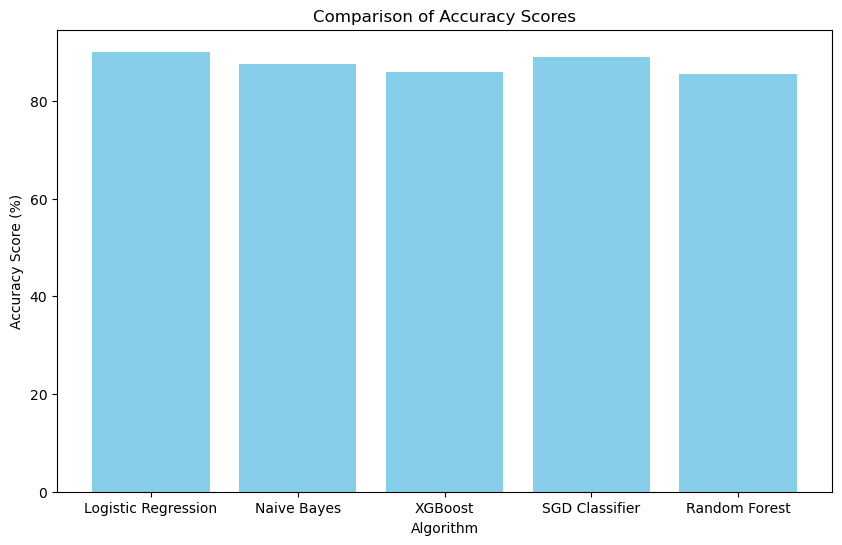

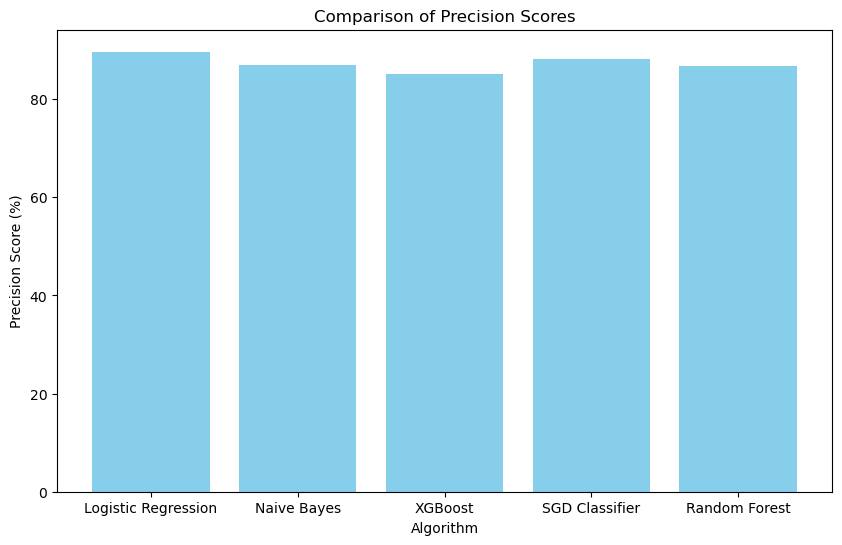

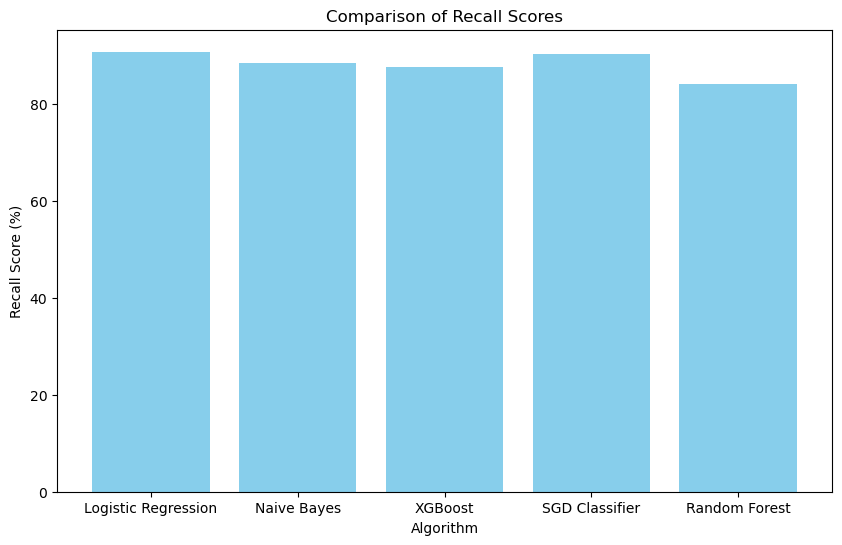

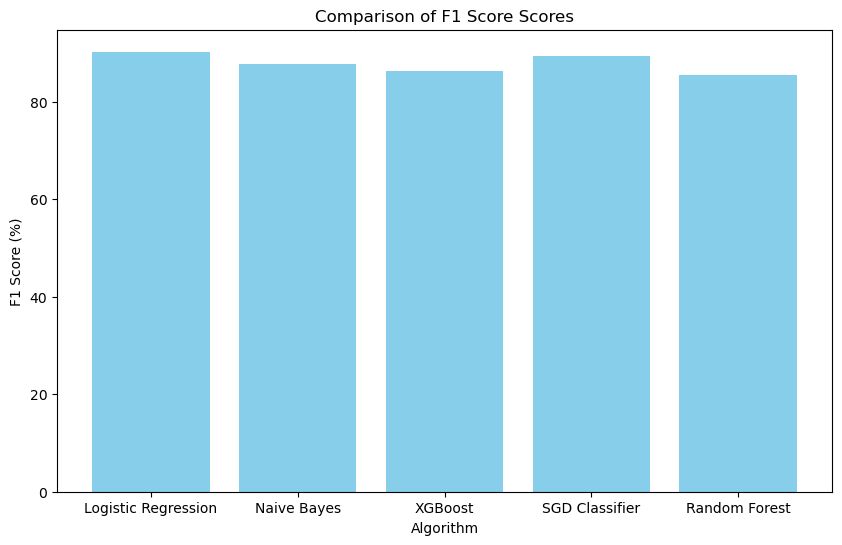

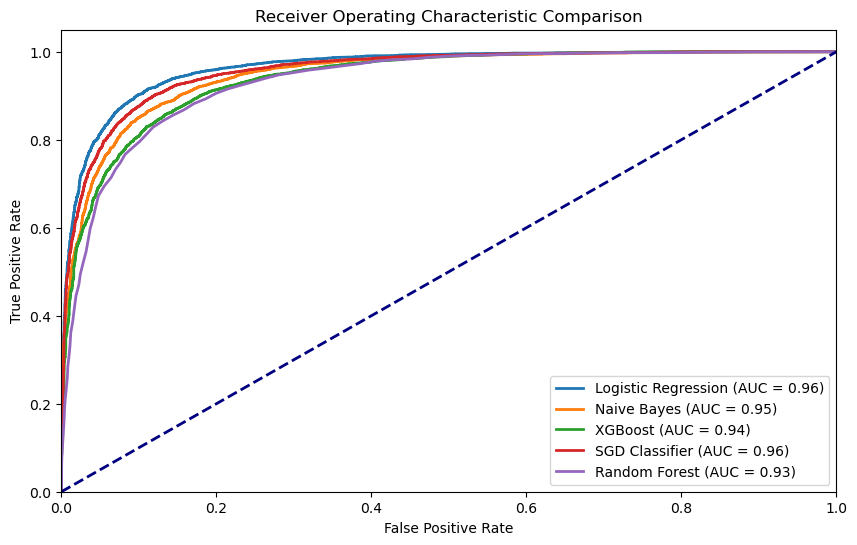

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SGD Classifier": SGDClassifier(max_iter=1000, loss='log_loss'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Training models and calculating metrics
metrics_scores = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    metrics_scores["Accuracy"][name] = accuracy_score(y_test, y_pred) * 100
    metrics_scores["Precision"][name] = precision_score(y_test, y_pred) * 100
    metrics_scores["Recall"][name] = recall_score(y_test, y_pred) * 100
    metrics_scores["F1 Score"][name] = f1_score(y_test, y_pred) * 100

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

# Function to plot the metrics
def plot_metrics(metric_name, metrics_values, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
    plt.xlabel('Algorithm')
    plt.ylabel(ylabel)
    plt.title(f'Comparison of {metric_name} Scores')
    plt.show()

# Plotting all metrics
plot_metrics("Accuracy", metrics_scores["Accuracy"], 'Accuracy Score (%)')
plot_metrics("Precision", metrics_scores["Precision"], 'Precision Score (%)')
plot_metrics("Recall", metrics_scores["Recall"], 'Recall Score (%)')
plot_metrics("F1 Score", metrics_scores["F1 Score"], 'F1 Score (%)')

# Plotting ROC curves
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 90.33 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4451  508]
 [ 459 4582]]


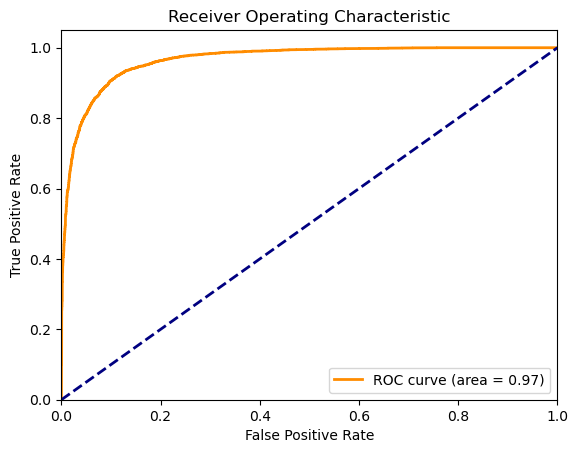

ROC Curve:
AUC Score: 0.9654449565188764


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2

# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Feature selection
kbest = SelectKBest(chi2, k=5000)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# Hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create and train the logistic regression model with GridSearchCV
model = GridSearchCV(LogisticRegression(max_iter=500), param_grid, scoring='accuracy', cv=5)
model.fit(X_train_kbest, y_train)

# Best model parameters
print("Best Parameters:", model.best_params_)

# Make predictions on the test set with the best model
y_pred = model.predict(X_test_kbest)
y_pred_proba = model.predict_proba(X_test_kbest)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy Score:", accuracy, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


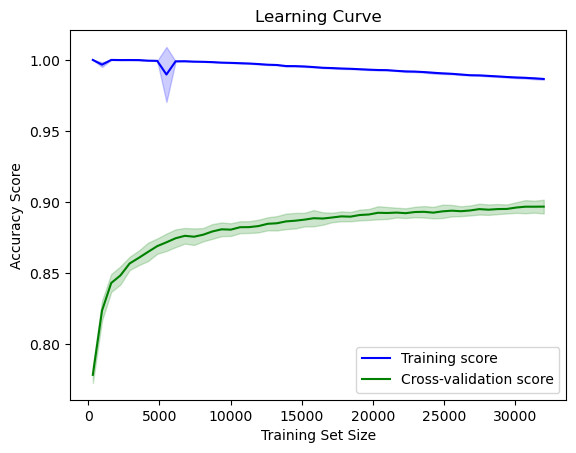

In [34]:
# Add code for learning curve here
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

# Draw bands for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

Accuracy Score: 90.33 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4461  498]
 [ 469 4572]]


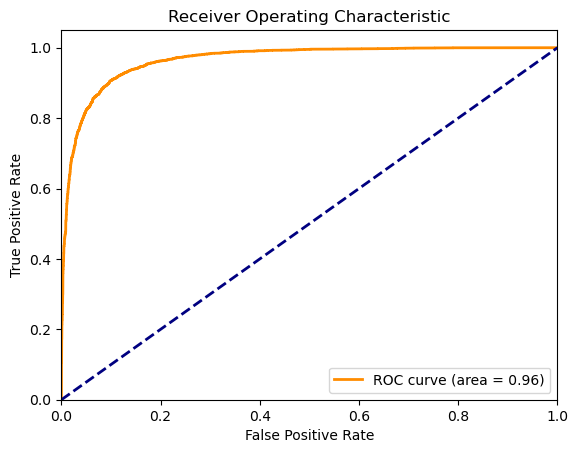

ROC Curve:
AUC Score: 0.9648491164545903


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer



# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=500,C=10.0, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix

accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


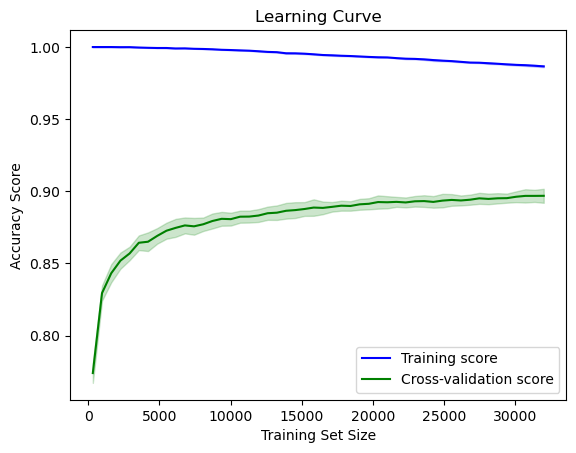

In [36]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

# Draw bands for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

Accuracy Score: 90.33 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4461  498]
 [ 469 4572]]


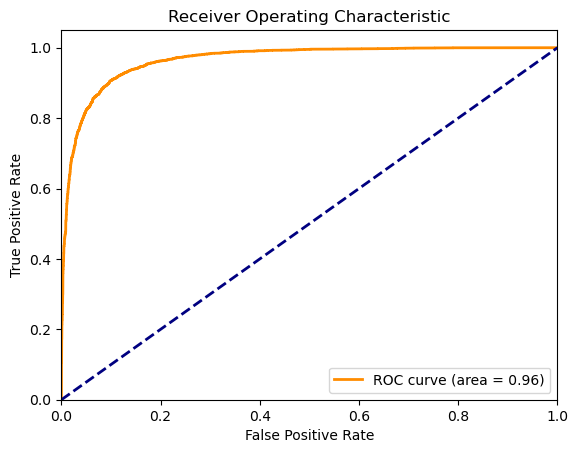

ROC Curve:
AUC Score: 0.9648491164545903


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer



# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=500,C=10.0, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix

accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


Accuracy Score: 90.16999999999999 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4959
           1       0.90      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix:
[[4437  522]
 [ 461 4580]]


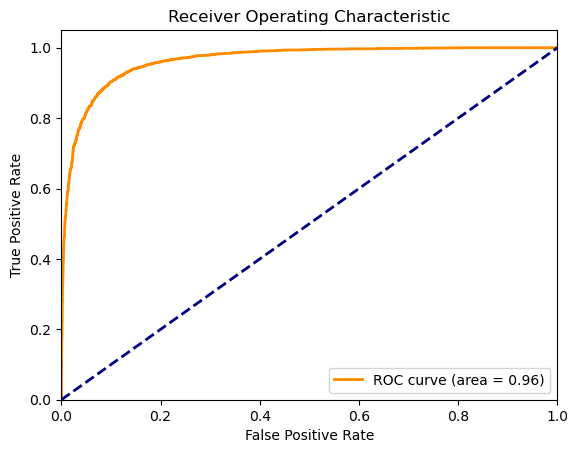

ROC Curve:
AUC Score: 0.9641304681326772


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer



# Convert sentiment to binary format
lb = LabelBinarizer()
df['sentiment'] = lb.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix, df.sentiment, test_size=0.2, random_state=101)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the accuracy score and print classification report and confusion matrix

accuracy = accuracy_score(y_test, y_pred) * 100  # Multiplied by 100
print("Accuracy Score:", accuracy, "%")


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC and AUC scores
print("ROC Curve:")
print("AUC Score:", roc_auc)


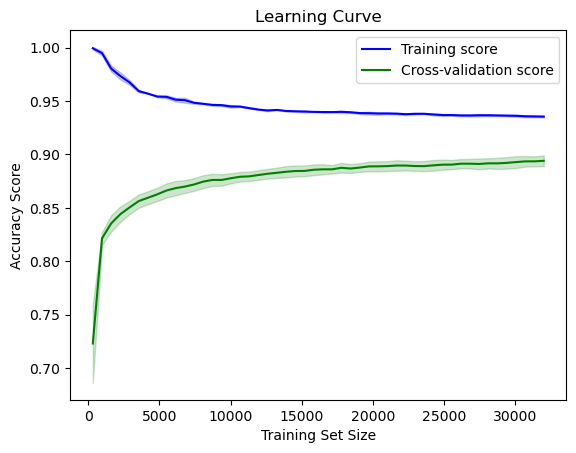

In [46]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

# Draw bands for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

In [61]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# Save the TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [62]:
# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Load the TfidfVectorizer
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')


In [63]:
def test_model(review, model, tfidf):
    # Transform the review using the loaded TfidfVectorizer
    transformed_review = tfidf.transform([review])
    
    # Predict using the loaded model
    prediction = model.predict(transformed_review)
    return "Positive" if prediction[0] == 1 else "Negative"


In [64]:
# Example of a positive review
sample_review = "I absolutely loved this movie! It exceeded all my expectations."

# Testing the model
prediction = test_model(sample_review, loaded_model, loaded_tfidf)
print("The predicted sentiment of the review is:", prediction)


The predicted sentiment of the review is: Positive


In [66]:
# Example of a Negative review
sample_review = "I absolutely hated this movie" 
# Testing the model
prediction = test_model(sample_review, loaded_model, loaded_tfidf)
print("The predicted sentiment of the review is:", prediction)


The predicted sentiment of the review is: Negative
